# Logistic Regression
## by Alejandro Puerto

In [59]:
# Library Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report, roc_auc_score, roc_curve, auc

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
def breast_cancer(value):
    values = cancer.target_names[value] 
    return values

In [4]:
# Cancer DataFrame
cancer_data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_data["diagnosis"] = cancer.target

# Edit column names
cancer_data.columns = cancer_data.columns.str.replace(" ", "_")
cancer_data.diagnosis = cancer_data.diagnosis.apply(breast_cancer)

cancer_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [5]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
# Data Size
cancer_shape = cancer_data.shape

print("Number of observations: ", cancer_shape[0])
print("Number of columns: ", cancer_shape[1])

Number of observations:  569
Number of columns:  31


## 1. Features Plot

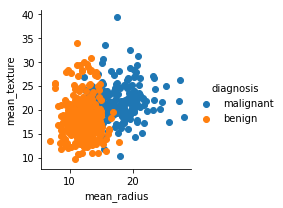

In [7]:
# Scatter Plot (Seaborn)
g = sns.FacetGrid(cancer_data, hue = "diagnosis")
g = g.map(plt.scatter, "mean_radius", "mean_texture")
g = g.add_legend()
plt.show()

## 2. Logistic Regression Prediction using one feature

### a)

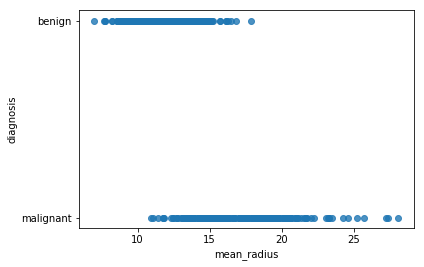

In [8]:
fig, ax = plt.subplots()
sns.regplot("mean_radius", "diagnosis", data = cancer_data, fit_reg = False)

### b)

In [9]:
mean_radius = cancer_data[['mean_radius']]
diagnosis = cancer_data['diagnosis']

In [10]:
log_reg = LogisticRegression(random_state = 0)

In [11]:
log_reg.fit(mean_radius, diagnosis)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### c)

In [12]:
intercept = log_reg.intercept_

In [13]:
coefficients = log_reg.coef_

In [14]:
print("w0 = {}".format(intercept))

for i in range(1, len(coefficients)+1):
    print("w{} = {}".format(i, coefficients[i-1]))

w0 = [-8.19393897]
w1 = [0.54291739]


### d)

In [15]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

In [16]:
omega = np.array([8.19393897, -0.54291739])
x_train = np.c_[np.ones(len(mean_radius)), mean_radius]
y_logisticmodel = sigmoid(np.dot(x_train, omega))

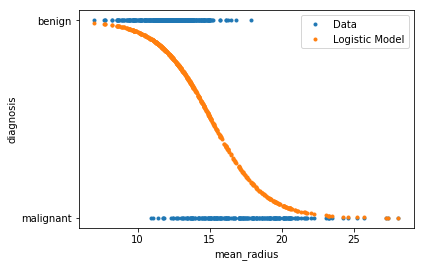

In [17]:
fig, ax = plt.subplots()
ax.plot(mean_radius, diagnosis, ".", label = "Data")
ax.plot(mean_radius, y_logisticmodel, '.', label = "Logistic Model")
ax.set(xlabel = "mean_radius", ylabel = "diagnosis")
ax.legend()
plt.show()

### e)

In [18]:
#cancer_data["diagnosis"] = cancer.target

In [19]:
mean_radius_8 = cancer_data[(cancer_data['mean_radius'] >= 8.00) & (cancer_data['mean_radius'] < 9.00)]
prediction_mean_radius_8 = mean_radius_8[['mean_radius']]
prediction_mean_radius_8

,mean_radius
46,8.196
59,8.618
61,8.598
71,8.888
114,8.726
116,8.950
151,8.219
175,8.671
314,8.597
358,8.878


In [20]:
mean_radius_20 = cancer_data[(cancer_data['mean_radius'] >= 20.00) & (cancer_data['mean_radius'] < 21.00)]
prediction_mean_radius_20 = mean_radius_20[['mean_radius']]
prediction_mean_radius_20

,mean_radius
1,20.57
4,20.29
78,20.18
95,20.26
210,20.58
233,20.51
237,20.48
250,20.94
260,20.31
265,20.73


#### prediction when mean_radius is 8

In [21]:
pd.DataFrame(log_reg.predict_proba(prediction_mean_radius_8), columns = ['malignant', 'benign'])

,malignant,benign
0,0.976892,0.023108
1,0.971114,0.028886
2,0.971417,0.028583
3,0.966705,0.033295
4,0.969423,0.030577
5,0.965604,0.034396
6,0.976608,0.023392
7,0.970296,0.029704
8,0.971432,0.028568
9,0.966879,0.033121


In [22]:
print(log_reg.predict(prediction_mean_radius_8))

['benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'benign']


#### prediction when mean_radius is 20

In [23]:
pd.DataFrame(log_reg.predict_proba(prediction_mean_radius_20), columns = ['malignant', 'benign'])

,malignant,benign
0,0.048620,0.951380
1,0.056155,0.943845
2,0.059405,0.940595
3,0.057024,0.942976
4,0.048370,0.951630
5,0.050149,0.949851
6,0.050931,0.949069
7,0.040127,0.959873
8,0.055582,0.944418
9,0.044756,0.955244


In [24]:
print(log_reg.predict(prediction_mean_radius_20))

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant']


## 3. Logistic Regression Prediction using all features

### a)

In [25]:
x = cancer_data.iloc[:, 0:29]
y = cancer.target

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0,stratify = y)

### b)

In [27]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
intercept = log_reg.intercept_
intercept = np.squeeze(intercept)

In [29]:
coefficients = log_reg.coef_
coefficients = np.squeeze(coefficients)

In [30]:
print("w0 = {}".format(intercept))

for i in range(1, len(coefficients)+1):
    print("w{} = {}".format(i, coefficients[i-1]))

w0 = 0.4000047336871354
w1 = 2.1273311195642943
w2 = 0.12524941586049282
w3 = -0.0011565827925450814
w4 = -0.008831504796151548
w5 = -0.12434699873623575
w6 = -0.4327557978261245
w7 = -0.6375120461921675
w8 = -0.31373119322135634
w9 = -0.17733943650308143
w10 = -0.0330486557485908
w11 = -0.0686181455622582
w12 = 0.6335851613384741
w13 = 0.4975958433507747
w14 = -0.10766726912904412
w15 = -0.013205829204649452
w16 = -0.05826715376177571
w17 = -0.10738684582600268
w18 = -0.04106086087915705
w19 = -0.03528010218230051
w20 = -0.00583191330242948
w21 = 1.189304147603376
w22 = -0.32178991580305744
w23 = -0.17338074490728209
w24 = -0.02065242125253479
w25 = -0.22283119266679086
w26 = -1.2204219522225093
w27 = -1.545762735633235
w28 = -0.6115125298696727
w29 = -0.49061659926968865


## 4. Testing the model

### a)

In [31]:
y_pred = log_reg.predict(x_test)

In [32]:
pd.DataFrame(list(zip(y_pred, y_test)), columns = ['predicted', 'original'])

,predicted,original
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


### b)

In [33]:
print(confusion_matrix(y_test, y_pred))

[[49  4]
 [ 5 85]]


### c)

In [34]:
precision_score(y_test, y_pred)

0.9550561797752809

In [35]:
print("The accuracy is: {}".format(precision_score(y_test, y_pred)))

The accuracy is: 0.9550561797752809


In [36]:
print("The recall is: {}".format(recall_score(y_test, y_pred)))

The recall is: 0.9444444444444444


In [37]:
print("The F1 Score is: {}".format(f1_score(y_test, y_pred)))

The F1 Score is: 0.9497206703910613


In [38]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.90740741, 0.95505618]),
 array([0.9245283 , 0.94444444]),
 array([0.91588785, 0.94972067]),
 array([53, 90], dtype=int64))

### d)

If a malignant tumor is represented as negative and benign tumor is presented as positive, what does it mean if:
* The precision or recall is high

 It means that our model has a relevant prediction percentage (95%), and that it will classify correctly our relevant results.(94%)
 
 
* The precision is low
 
 It means that very few of our predictions are true.
 

* The recall is low

 It means that most of our relevant results are never predicted.

### e)

In [39]:
print("The accuracy is: {}".format(log_reg.score(x_test, y_test)))

The accuracy is: 0.9370629370629371


In [40]:
print(classification_report(y_test, y_pred, target_names = cancer.target_names))

             precision    recall  f1-score   support

  malignant       0.91      0.92      0.92        53
     benign       0.96      0.94      0.95        90

avg / total       0.94      0.94      0.94       143



## 5. ROC Curve

### a)

In [42]:
log_roc_auc = roc_auc_score(y_test, y_pred)

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:, 1])

In [60]:
#roc_auc = auc(fpr, tpr)

In [53]:
fpr

array([0.        , 0.        , 0.03773585, 0.03773585, 0.05660377,
       0.05660377, 0.11320755, 0.11320755, 1.        ])

In [54]:
tpr

array([0.01111111, 0.92222222, 0.92222222, 0.93333333, 0.93333333,
       0.94444444, 0.94444444, 1.        , 1.        ])

In [55]:
thresholds

array([9.99971918e-01, 8.34334003e-01, 8.08110899e-01, 8.04936904e-01,
       6.94463053e-01, 6.29758241e-01, 4.88876192e-01, 1.67455572e-01,
       1.30638468e-25])

### c)

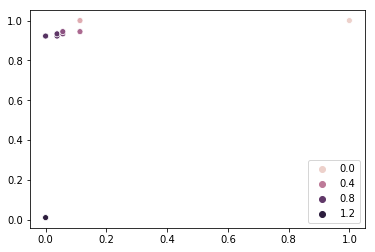

In [104]:
# Scatter Plot (Seaborn)
sns.scatterplot(x=fpr, y=tpr, hue=thresholds)
plt.show()

### d)

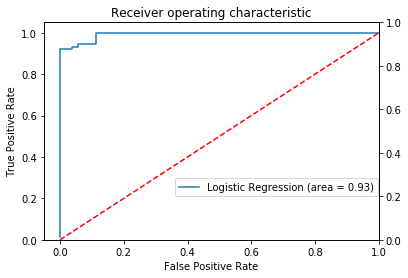

In [86]:
fig, ax = plt.subplots()
ax2 = plt.gca().twinx()
ax.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate', title = 'Receiver operating characteristic' )
ax.legend(loc=[0.39, 0.2])
plt.show()